In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("house.csv")
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']


In [7]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
train_data = X_train.join(y_train)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

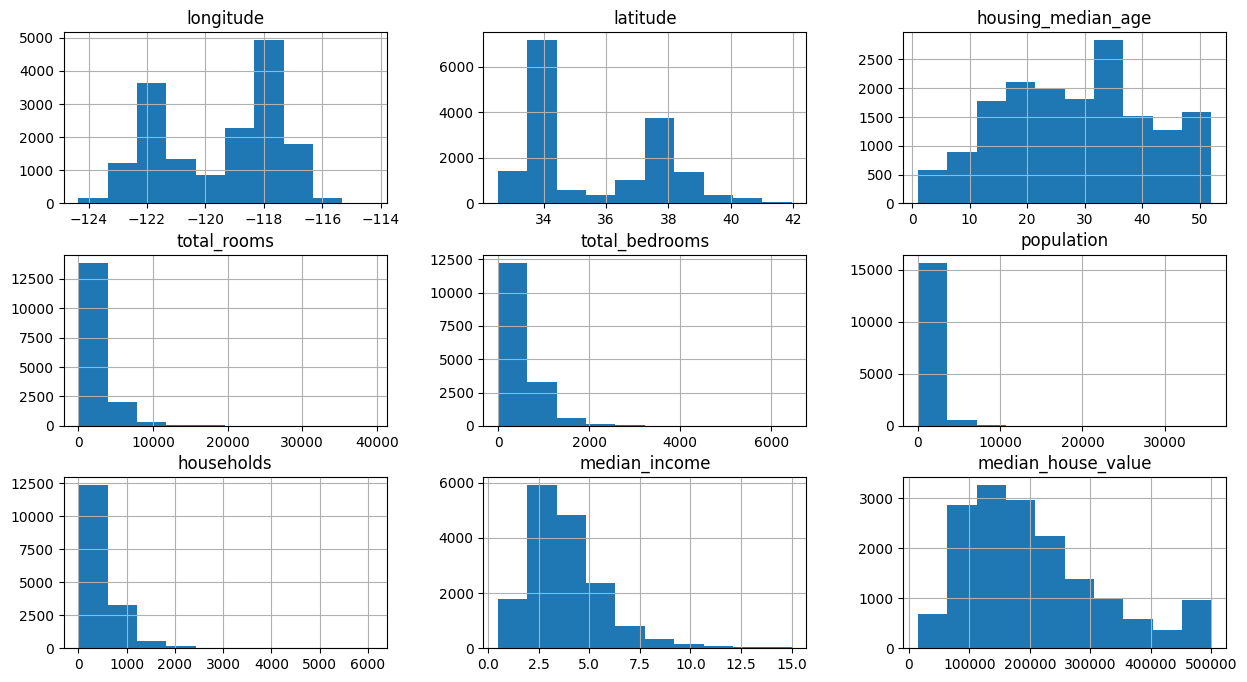

In [10]:
train_data.hist(figsize=(15,8))

In [11]:
import pandas as pd

# Convert categorical columns to numeric (if not already done)
train_data = pd.get_dummies(train_data, drop_first=True)


In [12]:
corr_matrix = train_data.corr()
print(corr_matrix)


                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924451           -0.115139   
latitude                    -0.924451  1.000000            0.016865   
housing_median_age          -0.115139  0.016865            1.000000   
total_rooms                  0.051664 -0.042211           -0.362655   
total_bedrooms               0.074247 -0.071105           -0.321708   
population                   0.102256 -0.110753           -0.295516   
households                   0.060104 -0.075067           -0.304051   
median_income               -0.014598 -0.078817           -0.122200   
median_house_value          -0.043659 -0.145151            0.102273   
ocean_proximity_INLAND      -0.052857  0.348456           -0.236265   
ocean_proximity_ISLAND       0.009386 -0.016585            0.014063   
ocean_proximity_NEAR BAY    -0.474573  0.359956            0.253167   
ocean_proximity_NEAR OCEAN   0.043142 -0.158593            0.022722   

     

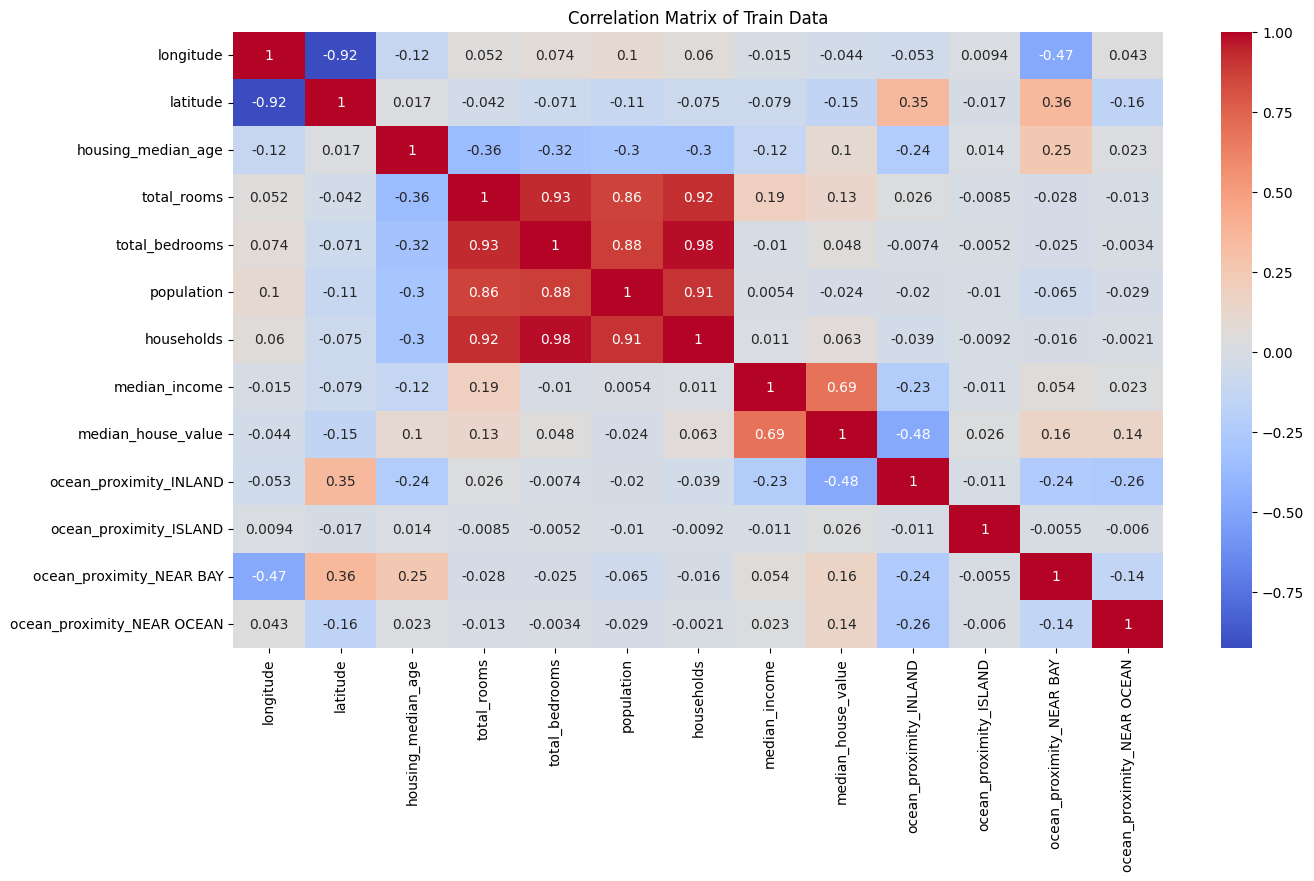

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Train Data")
plt.show()


In [14]:
import numpy as np

# Define the columns to transform
columns_to_transform = ['total_rooms', 'total_bedrooms', 'population', 'household']

# Identify which columns are present in train_data
existing_columns = [col for col in columns_to_transform if col in train_data.columns]

# Fill NaN values with 0 only for existing columns
train_data[existing_columns] = train_data[existing_columns].fillna(0)

# Apply log1p transformation only to existing columns
train_data[existing_columns] = np.log1p(train_data[existing_columns])

# Print column names to debug
print("Columns in train_data:", train_data.columns)


Columns in train_data: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

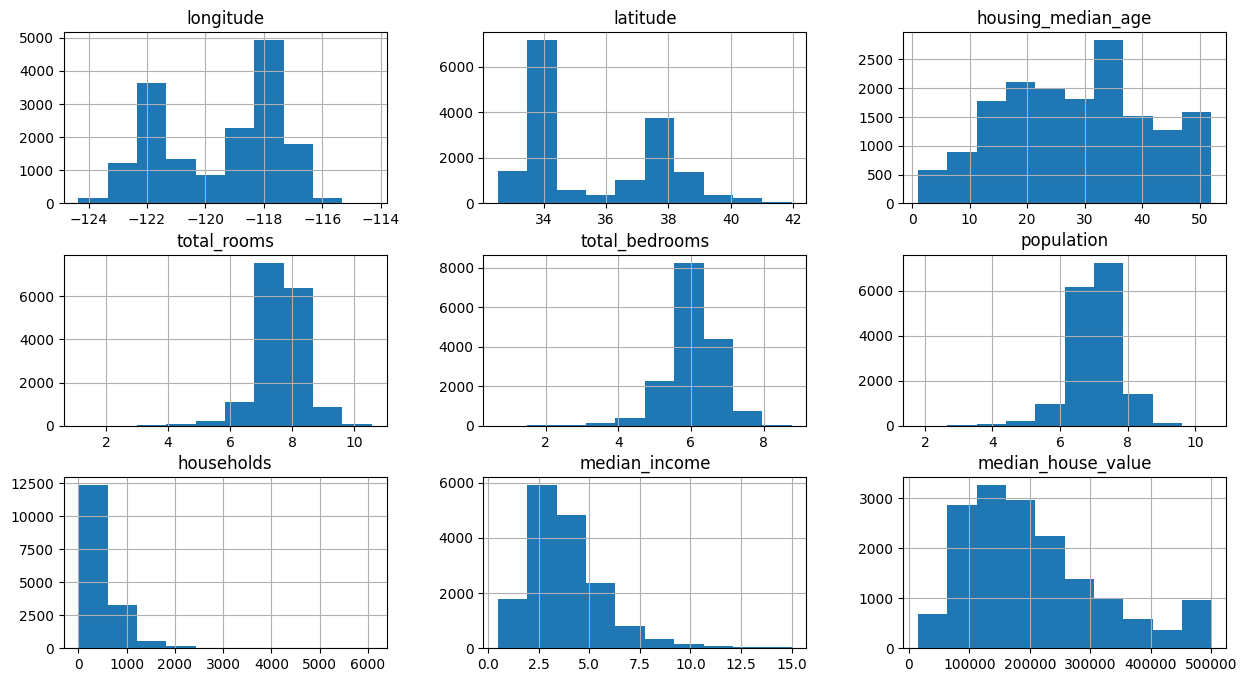

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
train_data['bed_ratio'] = train_data['total_bedrooms'] / (train_data['total_rooms'] + 1e-9)
train_data['rooms_per_household'] = train_data['total_rooms'] / (train_data['households'] + 1e-9)


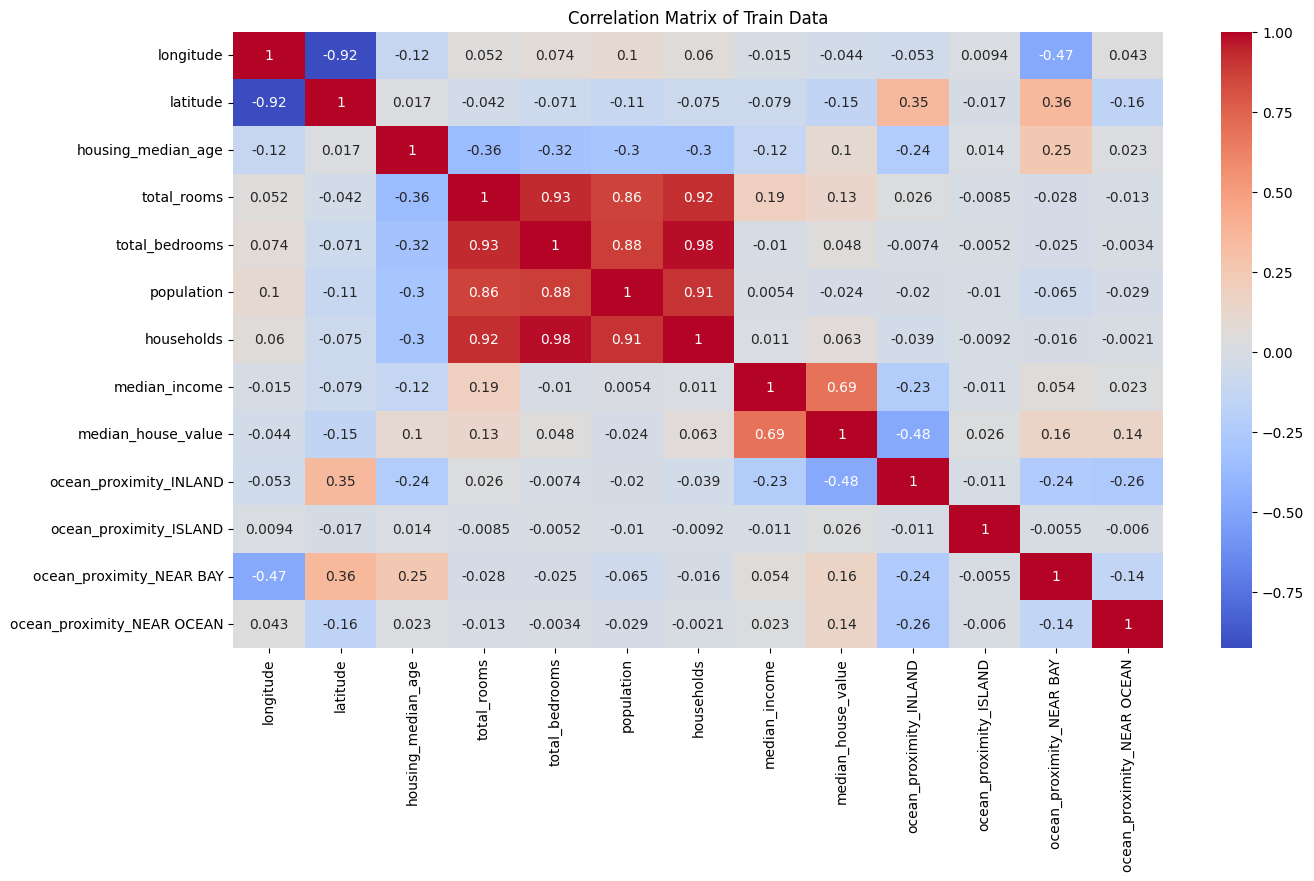

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Train Data")
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# Initialize and train the model
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [19]:
import numpy as np
import pandas as pd

test_data = X_test.join(y_test.to_frame())  # Ensure y_test is a DataFrame

columns_to_transform = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Identify existing columns in test_data
existing_columns = [col for col in columns_to_transform if col in test_data.columns]

# Fill NaN values with 0 only for existing columns
test_data[existing_columns] = test_data[existing_columns].fillna(0)

# Apply log1p transformation only to existing columns
test_data[existing_columns] = np.log1p(test_data[existing_columns])

# One-hot encoding for categorical variables
test_data = pd.get_dummies(test_data, drop_first=True)

# Feature Engineering
test_data['bed_ratio'] = test_data['total_bedrooms'] / (test_data['total_rooms'] + 1e-9)
test_data['rooms_per_household'] = test_data['total_rooms'] / (test_data['households'] + 1e-9)


In [20]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bed_ratio,rooms_per_household
4089,-118.42,34.15,48,6.523562,4.882802,5.594711,4.844187,4.6150,371400,False,False,False,False,0.748487,1.346678
19081,-122.48,38.31,29,7.773174,6.329721,7.025538,6.220590,2.3276,166200,False,False,False,False,0.814303,1.249588
8105,-118.21,33.79,39,7.377134,6.129050,7.433667,5.991465,2.3605,141800,False,False,False,True,0.830817,1.231274
5295,-118.44,34.07,35,7.587817,5.808142,7.137278,5.693732,8.9565,500001,False,False,False,False,0.765456,1.332661
11339,-117.93,33.76,24,8.071843,6.556778,8.104401,6.572283,4.1577,174100,False,False,False,False,0.812302,1.228164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15879,-122.41,37.75,52,7.680176,6.408529,7.618251,6.242223,2.0325,178100,False,False,True,False,0.834425,1.230359
14520,-117.14,32.91,14,8.011355,6.566672,7.680637,6.559615,3.7837,160300,False,False,False,False,0.819671,1.221315
8946,-118.45,34.02,41,7.991931,6.552508,7.100852,6.470800,3.4583,421900,False,False,False,False,0.819890,1.235076
10798,-117.93,33.62,33,7.544861,6.033086,6.756932,5.799093,4.5658,500001,False,False,False,False,0.799629,1.301042


In [20]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [21]:
# Ensure `X_test` has the same columns as `X_train`
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



In [22]:
# Convert categorical column `ocean_proximity` into dummy variables for both train and test
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

# Extract features and target variable
X_train = train_data.drop(columns=['median_house_value'])
y_train = train_data['median_house_value']

X_test = test_data.drop(columns=['median_house_value'])
y_test = test_data['median_house_value']

# Ensure X_test has same features as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train and test the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Get R² score
print("R² score:", reg.score(X_test, y_test))


R² score: -0.24723755543322934


In [23]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on scaled data
reg.fit(X_train_scaled, y_train)
print("Scaled R² score:", reg.score(X_test_scaled, y_test))


Scaled R² score: -0.24723755543321402


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest R² score:", rf.score(X_test, y_test))


Random Forest R² score: 0.7859443130486001


In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.68879997 0.64384728 0.673113   0.66487465 0.65484801]
Mean cross-validation score: 0.6650965829799949


In [26]:
feature_importance = rf.feature_importances_
feature_names = X_train.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
print(feature_imp_df)


                       Feature  Importance
7                median_income    0.483292
8       ocean_proximity_INLAND    0.141728
0                    longitude    0.098508
1                     latitude    0.091599
2           housing_median_age    0.051558
12                   bed_ratio    0.038130
5                   population    0.027410
3                  total_rooms    0.019629
4               total_bedrooms    0.013945
13         rooms_per_household    0.011333
11  ocean_proximity_NEAR OCEAN    0.010924
6                   households    0.010382
10    ocean_proximity_NEAR BAY    0.001225
9       ocean_proximity_ISLAND    0.000339


In [1]:
jupyter nbconvert --to script house_price.ipynb


SyntaxError: invalid syntax (2489162990.py, line 1)

In [2]:
jupyter nbconvert --to script house_price.ipynb


SyntaxError: invalid syntax (2489162990.py, line 1)

In [3]:
import nbconvert

!jupyter nbconvert --to script house_price.ipynb


[NbConvertApp] Converting notebook house_price.ipynb to script
[NbConvertApp] Writing 5610 bytes to house_price.py


In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("house.csv")

# Convert DataFrame to text format (tab-separated or space-separated)
df.to_csv("output.txt", sep="\t", index=False)  # Use sep=" " for space-separated format

print("CSV file converted to TXT successfully!")


CSV file converted to TXT successfully!
